In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [6]:
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1, mean=(3, 3)
)

In [11]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2+1))

In [14]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm='SAMME.R', n_estimators=200
)
bdt.fit(X, y)

<bound method AdaBoostClassifier.predict_proba of AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)>

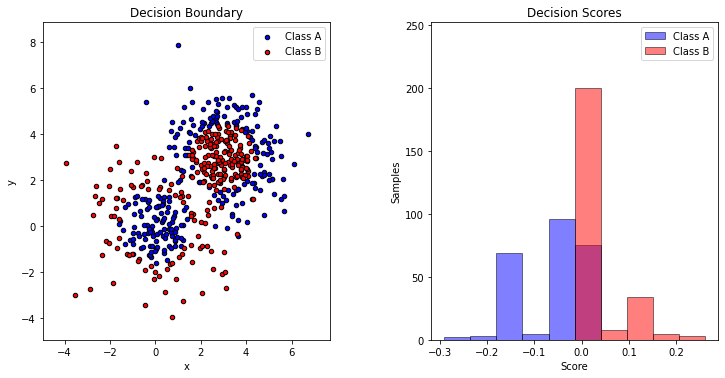

<Figure size 432x288 with 0 Axes>

In [40]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))
plt.subplot(121)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# 构建网格点
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), 
    np.arange(y_min, y_max, plot_step), 
)
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y==i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor='k',
        label="Class %s" % n
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label="Class %s" % n,
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")
plt.show()
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()